In [30]:
# Import the Modules 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
%matplotlib inline



In [2]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [31]:
# Loading the Dataset

df=pd.read_csv('Twitter train.csv')

In [32]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [33]:
# For this there is no need to check on the statistical values kindly only check the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Preprocessing the Data 

In [34]:
# This will remove the Pattern in the text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [35]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [36]:
# Remove the Twitter Handles that is @ from the above given Dataset

df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")

In [37]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [38]:
# Removing the special charachter Numbers and punctuations

df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [39]:
# Now we have to remove the short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x:" ".join([w for w in x.split() if len(w)>3]))

df.head()

# Now in the output you can see that it will give space if there are 3 words or else it will ignore

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguide society #motivation


In [40]:
# All the indiviuals words are considered as tokens 

tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: clean_tweet, dtype: object

In [41]:
# Stemp the words

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply (lambda sentence: [stemmer.stem(word)for word in sentence])
tokenized_tweet.head()

# The obejective of stemming is it will narrow down the words like fight fighting (will narrow down to fight)

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: clean_tweet, dtype: object

In [42]:
# Combine words into single string or sentence

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
    
df['clean_tweet'] = tokenized_tweet
df.head()
    



,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model love take with time
4,5,0,factsguide: society now #motivation,factsguid societi #motiv


# Exploratory Data Analysis

In [43]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


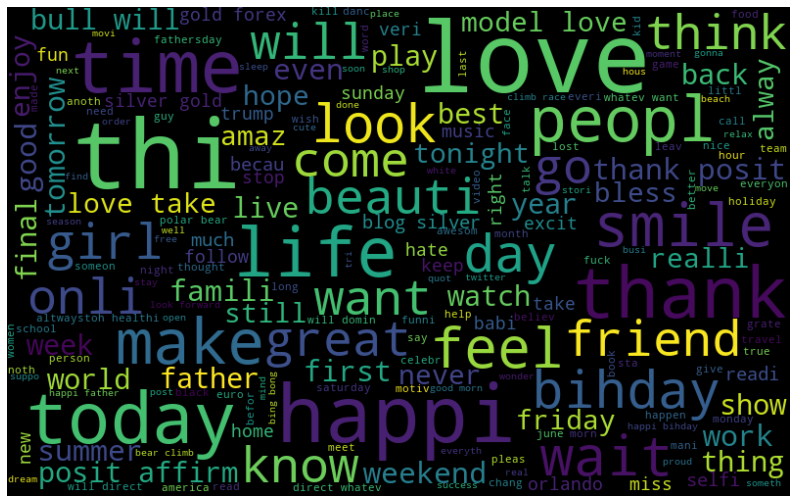

In [44]:
# Visualize frequent words

all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height=500, random_state=42, max_font_size=100).generate(all_words)


#plot the graph
plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

# so the below cloud word shoes the most used frequent words



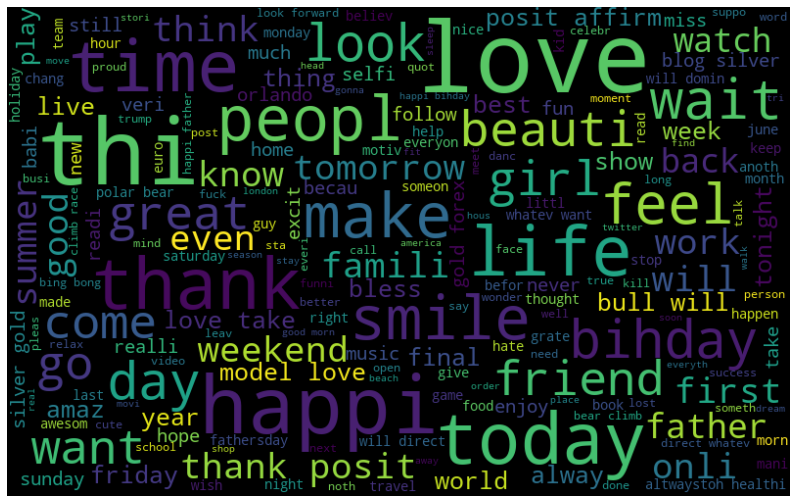

In [45]:
# Frequent words visualisation for Positive  words

all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])


wordcloud = WordCloud(width = 800, height=500, random_state=42, max_font_size=100).generate(all_words)


#plot the graph
plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()





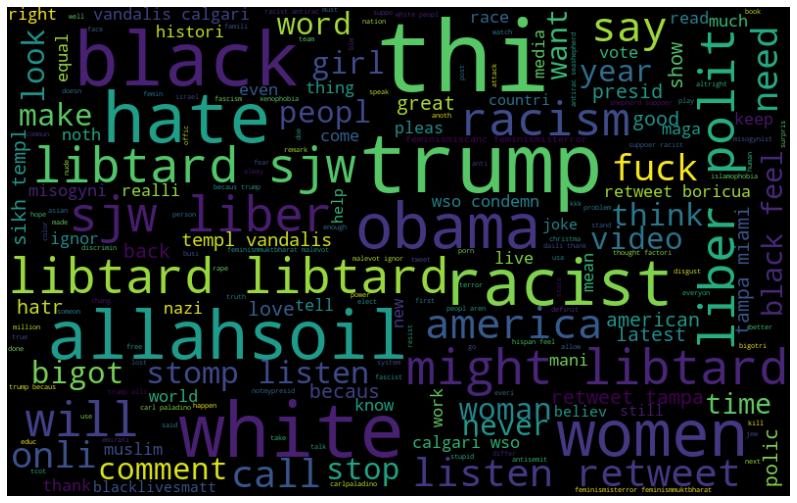

In [46]:
# Frequent word Visualisation Negative words

all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])


wordcloud = WordCloud(width = 800, height=500, random_state=42, max_font_size=100).generate(all_words)


#plot the graph
plt.figure(figsize=(16,9))
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

# Here what i have done is in the first line i have changed the value to 1 it represent negative tweets or words

In [98]:
# Extracting the hashtags

def hashtag_extract(tweets):
    hashtags =[]
    # Loop words in the tweets for wording tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags 

In [99]:
# extract hashtags for Non racist and sexiest words
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hastags from Racist and sextiest words


ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [100]:
#unnest the list
ht_positive = sum(ht_positive,[])
ht_negative = sum(ht_negative,[])    

In [101]:
ht_positive

['run',
 'lyft',
 'disapoint',
 'getthank',
 'model',
 'motiv',
 'allshowandnogo',
 'school',
 'exam',
 'hate',
 'imagin',
 'actorslif',
 'revolutionschool',
 'girl',
 'allin',
 'cav',
 'champion',
 'cleveland',
 'clevelandcavali',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshoot',
 'orlandoshoot',
 'biggerproblem',
 'selfish',
 'heabreak',
 'valu',
 'love',
 'gettingf',
 'got',
 'junior',
 'yugyoem',
 'omg',
 'thank',
 'posit',
 'friday',
 'cooki',
 'euro',
 'badday',
 'coneofsham',
 'cat',
 'piss',
 'funni',
 'laugh',
 'wine',
 'weekend',
 'tgif',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssa',
 'love',
 'smile',
 'media',
 'pressconfer',
 'antalya',
 'turkey',
 'throwback',
 'ica',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevib',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift',
 'travelingram',
 'dalat',
 'ripinkylif',
 'photoshop',
 'enoughisenough',
 'dontph

In [102]:
from nltk import FreqDist

In [103]:
freq=FreqDist(ht_positive)
d = pd.DataFrame ({'Hashtag' : list (freq.keys()),
                  'Count': list(freq.values())})

d.head()

,Hashtag,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


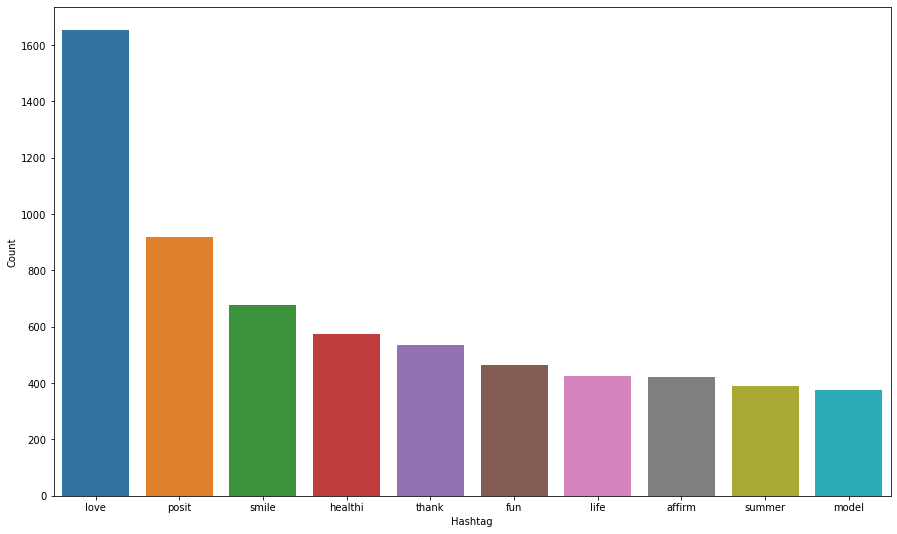

In [104]:
# select top 10 # 

d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

In [105]:
freq=FreqDist(ht_negative)
d = pd.DataFrame ({'Hashtag' : list (freq.keys()),
                  'Count': list(freq.values())})

d.head()

,Hashtag,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


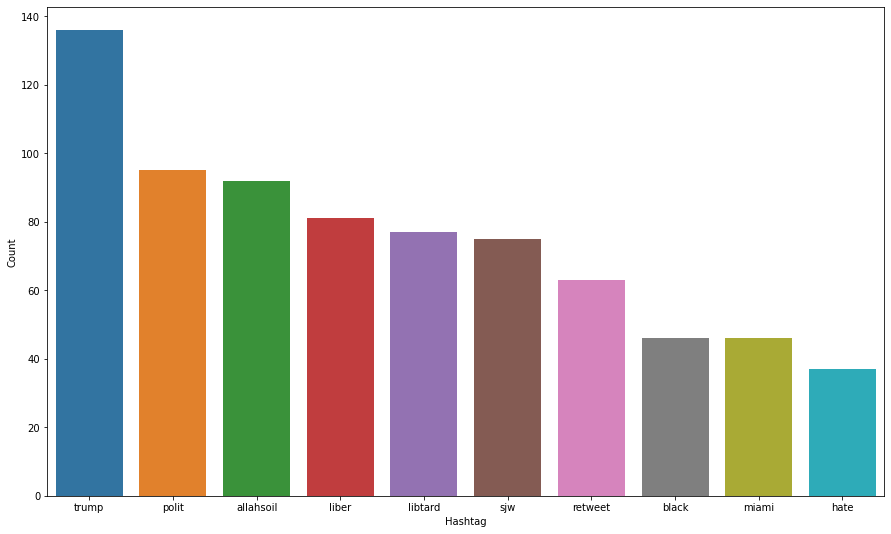

In [106]:
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='Count')
plt.show()

## Input Split

In [121]:
# Feature Extraction 

from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90,min_df=2, max_features=1000,stop_words='english')
bow= bow_vectorizer.fit_transform(df['clean_tweet'])

In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(bow,df['label'], random_state=42, test_size=0.25)

# Model Training

In [137]:
# Training 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [138]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [139]:
# Testing 
pred = model.predict(x_test)
f1_score(y_test,pred)

0.49763033175355453

In [140]:
accuracy_score(y_test,pred)

0.9469403078463271

In [141]:
# Use probablity to get output

pred_prob = model.predict_proba(x_test)
pred = pred_prob[:,1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

0.5545722713864307

In [142]:
accuracy_score(y_test, pred)

0.9433112251282693

In [144]:
pred_prob[0][1]>= 0.3

False